In [2]:
import pandas as pd
df=pd.read_csv("income.csv")

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


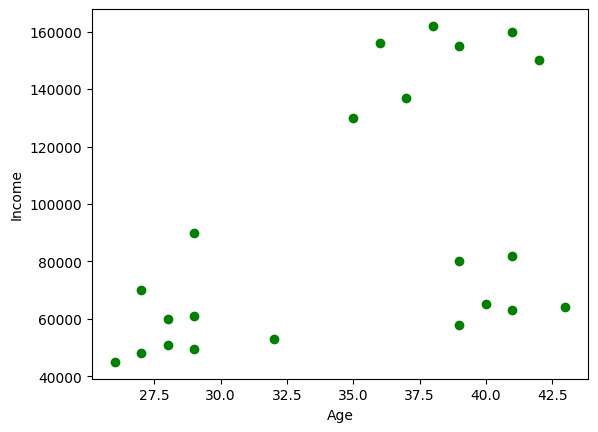

In [4]:
import  matplotlib.pyplot as plt
plt.scatter(df['Age'],df['Income($)'],color='green')
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [7]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [14]:
y_pred=km.fit_predict(df[['Age','Income($)']])
y_pred

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [15]:
df['cluster']=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


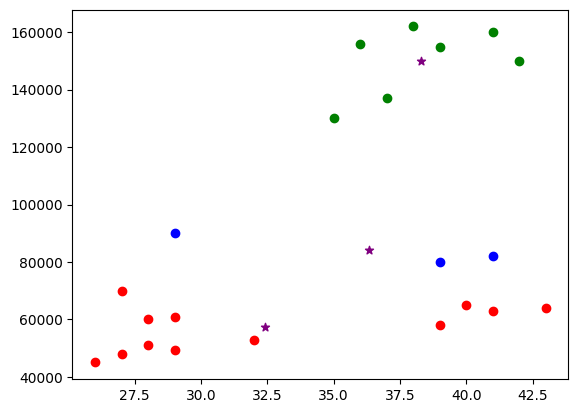

In [18]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',label='centriod',color='purple')
plt.show()

above figure has problem becuase y axis has large value and x axis has small 

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
df['Age']=scaler.fit_transform(df[['Age']])
df.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [29]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Age','Income($)']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [28]:
df['cluster']=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [31]:
km.cluster_centers_
#x_axis and y_axis distance 

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

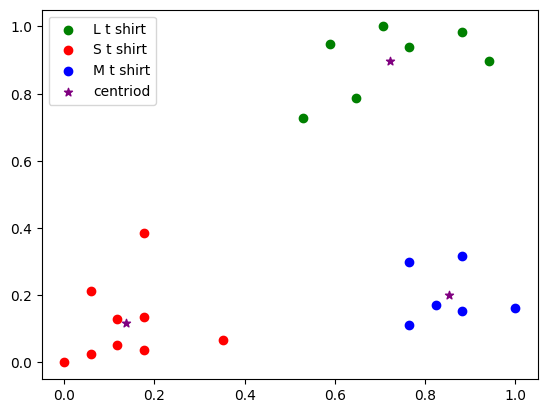

In [35]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]
plt.scatter(df1['Age'],df1['Income($)'],color='green',label='L t shirt')
plt.scatter(df2['Age'],df2['Income($)'],color='red',label='S t shirt')
plt.scatter(df3['Age'],df3['Income($)'],color='blue',label='M t shirt')
#first draw x_axis and then y_axis
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',label='centriod',color='purple')
plt.legend()
plt.show()

choose numb of cluster using elbow method

In [37]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.4201552205731442,
 0.35644572879234854,
 0.2406485899890804,
 0.21628098847751787,
 0.15525565952103082,
 0.1261838985292243]

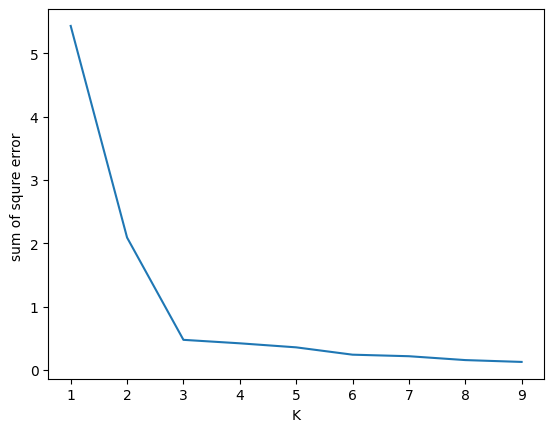

In [38]:
plt.xlabel("K")
plt.ylabel("sum of squre error ")
plt.plot(k_rng,sse)
plt.show()